<a href="https://colab.research.google.com/github/Darkling-01/Airbnb-Machine-Learning/blob/main/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project is for Machine Learning CSE5160

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from google.colab import files

print("SETUP COMPLETE...")

In [5]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [6]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/airbnb_data.csv')
dataset.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [8]:
print('Number of rows in the dataframe:', dataset.shape[0])
print('Number of columns in the dataframe:', dataset.shape[1])

Number of rows in the dataframe: 74111
Number of columns in the dataframe: 29


In [7]:
dataset.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

In [8]:
#avoid bias or variance
dataset = dataset.sample(frac = 1)

In [9]:
property_type = dataset["property_type"].unique()
print("Property Type:")
print("\n- ".join(property_type))

Property Type:
Apartment
- House
- Guesthouse
- Townhouse
- Other
- Condominium
- Bungalow
- Loft
- Timeshare
- Villa
- Bed & Breakfast
- Dorm
- Boutique hotel
- Guest suite
- Hostel
- Boat
- Tent
- In-law
- Chalet
- Cabin
- Castle
- Camper/RV
- Serviced apartment
- Treehouse
- Hut
- Vacation home
- Yurt
- Casa particular
- Earth House
- Train
- Tipi
- Cave
- Parking Space
- Lighthouse
- Island


Text(0.5, 1.0, 'Top 5 States')

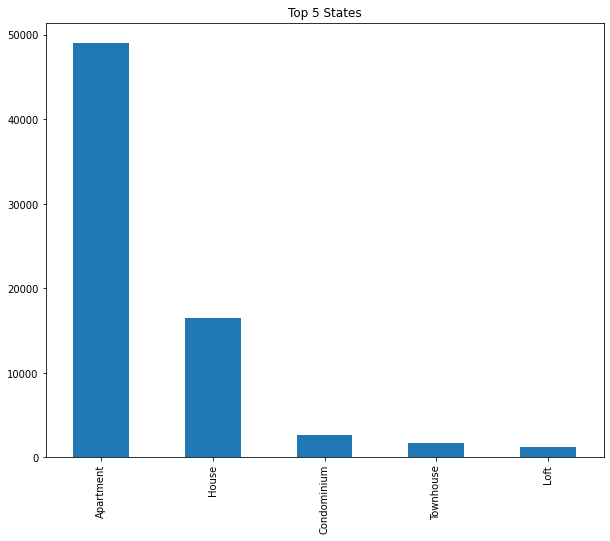

In [23]:
top_5 = dataset['property_type'].value_counts()[:5]
top_5.plot(kind = 'bar', figsize = (10, 8))
plt.title('Top 5 States')

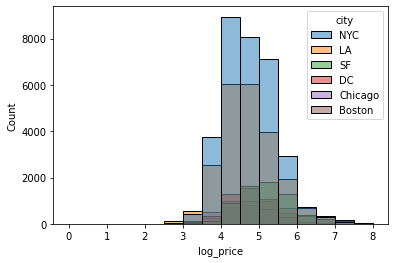

In [17]:
#visualize the data set
#train log_price
sns.histplot(data = dataset, x = "log_price", binwidth = .5, hue = "city")

0.9028677115420143


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


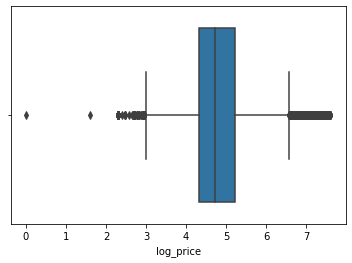

In [18]:
sns.boxplot(dataset['log_price'])

#using the IQR method to find the outliers is commonly used and more trusted.
Q1 = np.percentile(dataset['log_price'], 25, interpolation = 'midpoint')
Q3 = np.percentile(dataset['log_price'], 75, interpolation = 'midpoint')

IQR = Q3 - Q1
print(IQR)
#round up quartile if decimal: 0.90 = 1

In [12]:
#find the attributes
#X is independent
X = np.array(dataset.drop(["description"],1))
print("Shape of X: ", X.shape)
print(X)
#y is dependent
y = np.array(dataset["description"])
print("Shape of y: ", y.shape)
print(y)

Shape of X:  (74111, 28)
[[16838955 5.293304824724492 'Apartment' ... '11249.0' 1.0 1.0]
 [2437011 4.442651256490317 'House' ... '90066' 1.0 1.0]
 [2318200 7.309881485824786 'House' ... '90293' 6.0 8.0]
 ...
 [17403306 4.836281906951479 'House' ... '90291' 2.0 2.0]
 [9748012 4.31748811353631 'House' ... '91030' 1.0 1.0]
 [12256288 4.672828834461906 'Apartment' ... '11212.0' 2.0 3.0]]
Shape of y:  (74111,)
['My apartment is a brand new modern one bedroom, one bathroom with a washer/dryer.  The building is full of great amenities such as gym, roof deck, several lounges and bocce ball court.  There is free wifi all over the building.'
 "Welcome! We're looking forward to hosting you in our beautiful home. Enjoy yourself in warm & sunny Los Angeles. The ocean calls your name with a short 15 minute bike ride. LAX is a 20 minute drive away. Centrally located to the 10 & 405 freeway. Welcome! Whether you are visiting for business or pleasure enjoy the security of a  meticulously clean, warm an

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
#Splitting
n_train = math.floor(0.8 * X.shape[0])
n_test = math.ceil((1 - 0.8)* X.shape[0])

X_train = X[:n_train]
y_train = y[:n_train]
X_test = X[n_train:]
y_test = y[n_train:]

print("Total number of rows in train: ", X_train.shape[0])
print("Total number of rows in test: ", X_test.shape[0])

Total number of rows in train:  59288
Total number of rows in test:  14823


In [ ]:
#try to print a graph here

In [14]:
#Coding the linear regression class
class linearRegression():
  def __init__(self):    #creates new object when class is called
    #no instance is required
    pass

  def forward(self, X, y , W):
    """
    Parameters:
    X - independent
    y - dependent/target
    W - Wights

    Returns:
    loss - calculate sqaured erroe loss for y and y_pred
    y_pred - predicted target variable
    """
  y_pred = sum(W * X)
  loss = ((y_pred - y) ** 2) / 2

    


NameError: ignored